In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linear_lsf(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_sq_bar = np.mean([i**2 for i in x])
    x_bar_sq = x_bar**2
    xy = []
    for i in range(len(x)):
        xy.append(x[i]*y[i])
    xy_bar = np.mean(xy)
    x_bar_y_bar = x_bar*y_bar
    b = (xy_bar - x_bar_y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - b*x_bar
    
    #Error table
    err_table = pd.DataFrame(columns=['x','y','y^p','e','e^2'])
    err_table['x'] = x
    err_table['y'] = y
    err_table['y^p'] = [a + b*i for i in x]
    err_table['e'] = err_table['y'] - err_table['y^p']
    err_table['e^2'] = err_table['e']
    err_table.index+=1
#     print(err_table)

    #Error Calculation
    n = len(x)
    e_sum = err_table['e'].sum()
    err_y = err_table['e^2'].sum()/(n-2)
    err_a_sq = (x_sq_bar*(err_y**2))/(n*(x_sq_bar-x_bar_sq))
    err_b_sq = (err_y)**2/(n*(x_sq_bar-x_bar_sq))
    err_a = err_b_sq**(1/2)
    err_b = err_a_sq**(1/2)

    err_result = pd.DataFrame(columns=['Quantity','Value'])
    err_result['Quantity'] = ['Sum of e','err_y','err_b_sq','err_a_sq','err_b','err_a']
    err_result['Value'] = [e_sum,err_y,err_b_sq,err_a_sq,err_b,err_a]
    err_result.index+=1
    
    return b,a, err_table, err_result

def data_plot(b,a,x,y,x_label,y_label,fig_name,save_plot):
    x_line = np.linspace(min(x),max(x),1000)
    y_line = [a+b*i for i in x_line]
    plt.plot(x_line,y_line)
    plt.scatter(x,y,c='orange')
    eq = f'${y_label} = {round(a,8)} + {round(b,8)}{x_label}$'
    t1= plt.text(max(x)*0.50, max(y)*0.100, r"{}".format(eq), fontsize=12)
    t1.set_bbox(dict(facecolor='white', edgecolor='black'))
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    if save_plot:
        plt.savefig(f'data/{fig_name}.png',dpi=200)
    plt.show()
    

In [2]:
M=[5,7,10,12,15,17,20,25]
Lt=[17.8216667,19.4833333,23.31,26.1633333,28.7066667,30.3733333,32.88833333,36.585]

Ltsq=[i**2 for i in Lt]


tab = pd.DataFrame({'M':M,'l':Lt,'l^2':Ltsq})
tab.index+=1


LEAST SQUARE FIT


Slope(b)= 52.096041538327505
Intercept(a)= 38.64304525753505


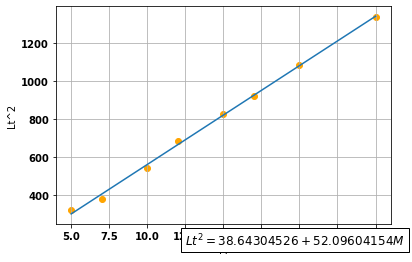



Here x = M and y = Lt^2

Error Table
     x            y          y^p          e        e^2
1   5   317.611804   299.123253  18.488551  18.488551
2   7   379.600276   403.315336 -23.715060 -23.715060
3  10   543.356100   559.603461 -16.247361 -16.247361
4  12   684.520009   663.795544  20.724466  20.724466
5  15   824.072713   820.083668   3.989045   3.989045
6  17   922.539376   924.275751  -1.736376  -1.736376
7  20  1081.642469  1080.563876   1.078593   1.078593
8  25  1338.462225  1341.044084  -2.581859  -2.581859 

   Quantity         Value
1  Sum of e -5.684342e-14
2     err_y -9.473903e-15
3  err_b_sq  2.832500e-31
4  err_a_sq  6.574940e-29
5     err_b  8.108601e-15
6     err_a  5.322124e-16


In [3]:
#Least Square fit for data


#print('\n\n\n\n',tab,'\n')

b,a,err_table,err_result = linear_lsf(M,Ltsq)

print('\nLEAST SQUARE FIT\n\n')
print('Slope(b)=',b)
print('Intercept(a)=',a)
fig_name = 'practical_exam_plot'
data_plot(b,a,M,Ltsq,'M','Lt^2',fig_name,False)

print('\n\nHere x = M and y = Lt^2\n')
print('Error Table\n',err_table,'\n')
print(err_result)